# MNS - Biological Plausible Deep Learning
## Visualization Notebook - Get Results Ready for Report

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import os
# Import log-helper/learning plot functions
from utils.helpers import *
from utils.logger import *
from utils.plotting import *

In [4]:
fig_dir = os.getcwd() +"/figures"
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    print("Created New Figures Directory")
    
log_dir = os.getcwd() + "/logs"

In [5]:
download_data()

No download of MNIST needed.
No download of Fashion-MNIST needed.
No download of CIFAR-10 needed.


In [6]:
# MNIST dataset
X_mnist, y_mnist = get_data(num_samples=70000, dataset="mnist")
# MNIST dataset
X_fashion, y_fashion = get_data(num_samples=70000, dataset="fashion")
# MNIST dataset
X_cifar10, y_cifar10 = get_data(num_samples=60000, dataset="cifar10")

# Visualize the Datasets

In [7]:
mnist_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
cifar10_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Saved figure to /Users/rtl/Dropbox/PHD_ECN/COURSES/WiSe_2018_Models_of_Neural_Systems/PROJECT/CODE/figures/mnist.png


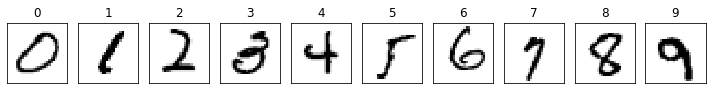

In [8]:
plot_labels(X_mnist, y_mnist, mnist_labels,
            save_fname=fig_dir + "/mnist.png")

Saved figure to /Users/rtl/Dropbox/PHD_ECN/COURSES/WiSe_2018_Models_of_Neural_Systems/PROJECT/CODE/figures/fashion.png


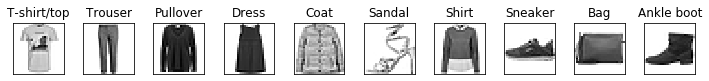

In [9]:
plot_labels(X_fashion, y_fashion, fashion_labels,
            save_fname=fig_dir + "/fashion.png")

Saved figure to /Users/rtl/Dropbox/PHD_ECN/COURSES/WiSe_2018_Models_of_Neural_Systems/PROJECT/CODE/figures/cifar10.png


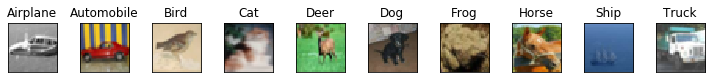

In [10]:
plot_labels(X_cifar10, y_cifar10, cifar10_labels,
            save_fname=fig_dir + "/cifar10.png")

# Visualize the Learning Performance for all Datasets

In [43]:
# log_fname = get_latest_log_fname(log_dir)
log_fname_mnist = os.getcwd() + "/logs/log_mnist_10epochs_784_500_10"
log_fname_fashion = os.getcwd() + "/logs/log_fashion_10epochs_784_500_10"
log_fname_cifar10 = os.getcwd() + "/logs/log_cifar10_10epochs_3072_500_10"

log_fnames = [log_fname_mnist, log_fname_fashion, log_fname_cifar10]
its, train_losses, val_losses, train_accs, val_accs = process_logger_learning(log_fnames)

sub_titles = ["MNIST: DNN (784-500-10)",
              "Fashion-MNIST: DNN (784-500-10)",
              "CIFAR-10: DNN (3072-500-10)"]

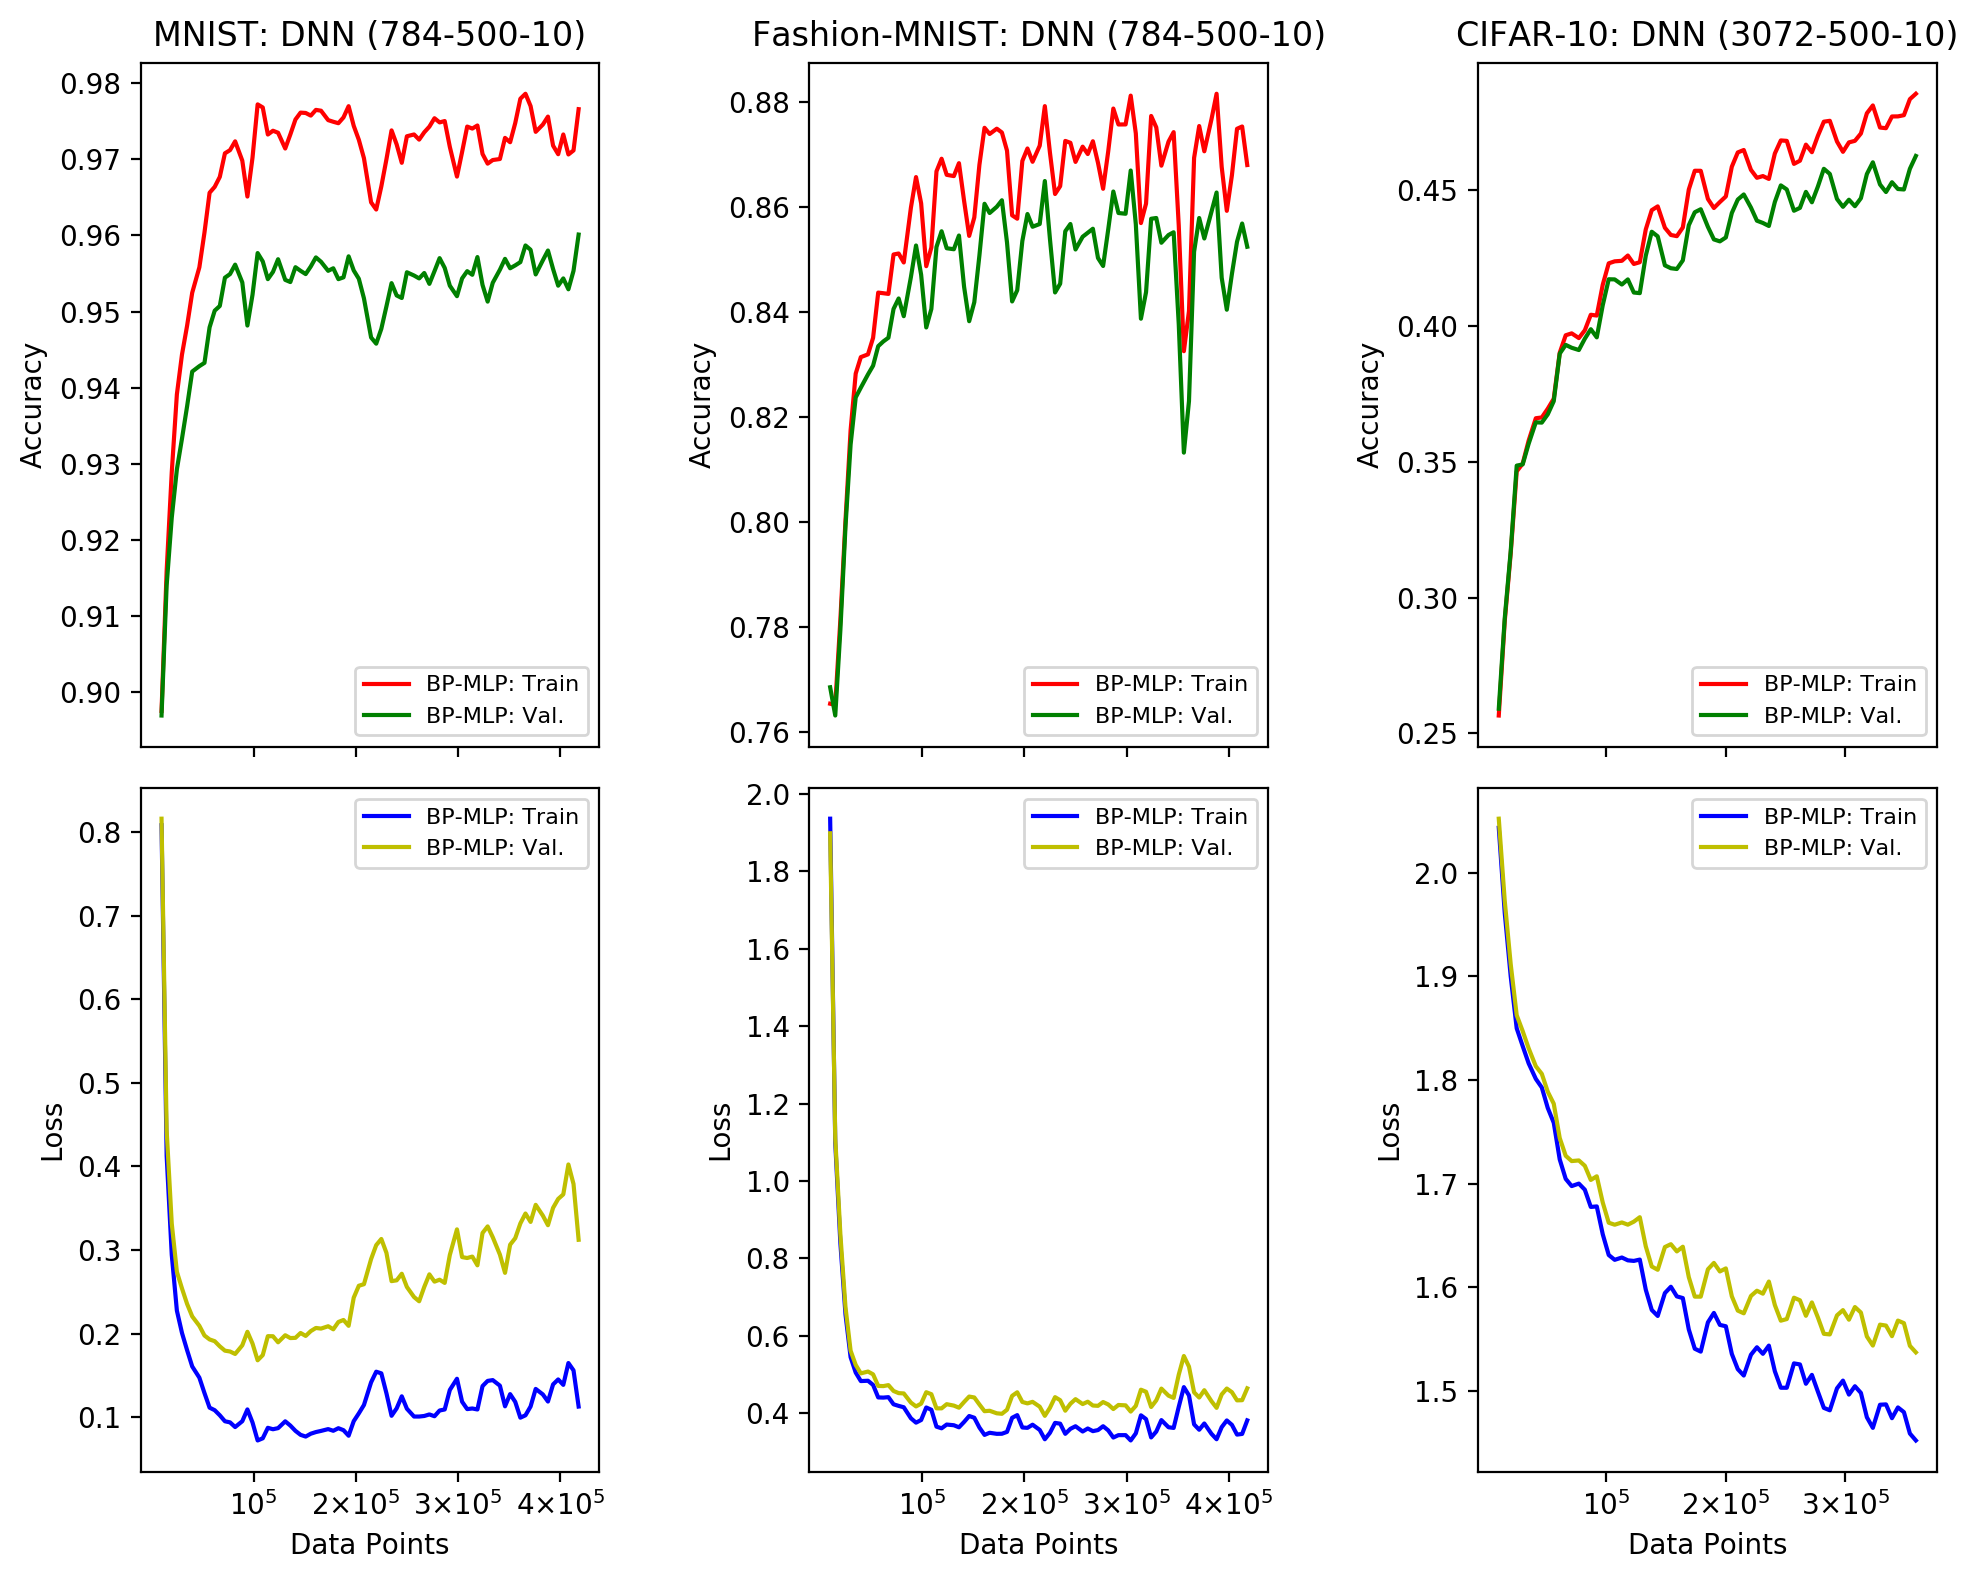

In [45]:
plot_all_learning(its, train_accs, val_accs, train_losses, val_losses,
                  2, sub_titles)

# Visualize the Weight Dynamics throughout Learning

In [30]:
wlog_fname_mnist = os.getcwd() + "/logs/weight_log_temp_model_dnn_mnist_10epochs.pkl"
wlog_fname_fashion = os.getcwd() + "/logs/weight_log_temp_model_dnn_fashion_10epochs.pkl"
wlog_fname_cifar10 = os.getcwd() + "/logs/weight_log_temp_model_dnn_cifar_10epochs.pkl"

mnist_its, mnist_w, mnist_w_ch, mnist_w_grad_ch, mnist_b, mnist_b_ch, mnist_b_grad_ch = process_logger_weights(wlog_fname_mnist)
fashion_its, fashion_w, fashion_w_ch, fashion_w_grad_ch, fashion_b, fashion_b_ch, fashion_b_grad_ch = process_logger_weights(wlog_fname_fashion)
cifar10_its, cifar10_w, cifar10_w_ch, cifar10_w_grad_ch, cifar10_b, cifar10_b_ch, cifar10_b_grad_ch = process_logger_weights(wlog_fname_cifar10)

In [54]:
its = [mnist_its, fashion_its, cifar10_its]
fr_n_weights = [mnist_w, fashion_w, cifar10_w]
fr_n_weights_ch = [mnist_w_ch, fashion_w_ch, cifar10_w_ch]
fr_n_weights_grad_ch = [mnist_w_grad_ch, fashion_w_grad_ch, cifar10_w_grad_ch]

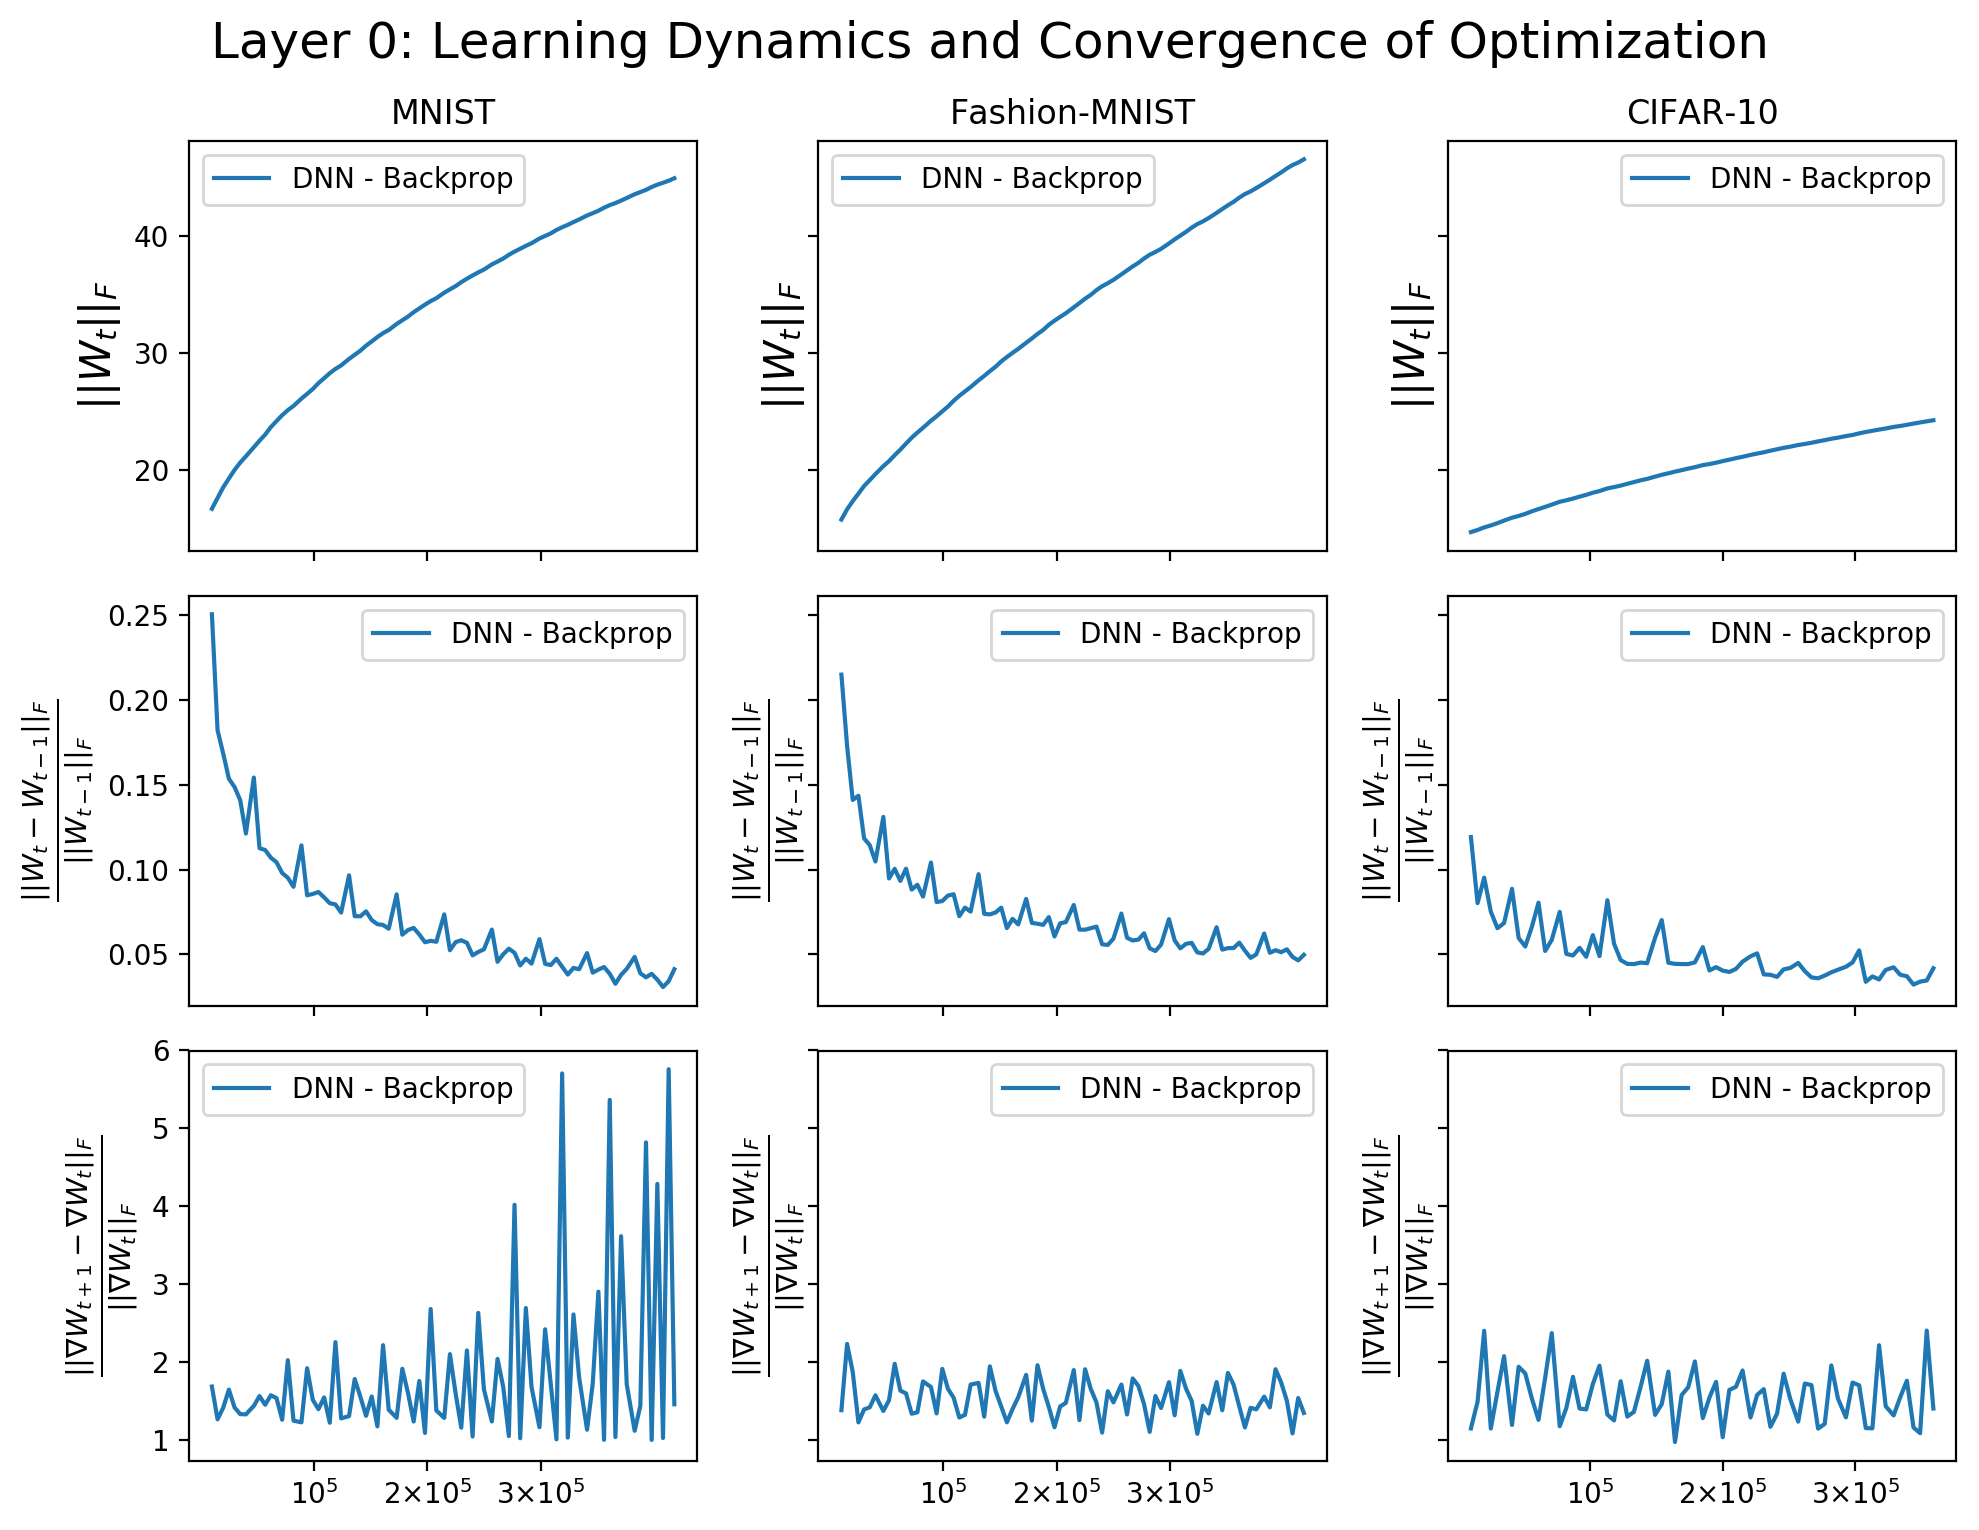

In [61]:
plot_weight_dev(its, 0, fr_n_weights, fr_n_weights_ch, fr_n_weights_grad_ch,
                'Layer 0: Learning Dynamics and Convergence of Optimization')

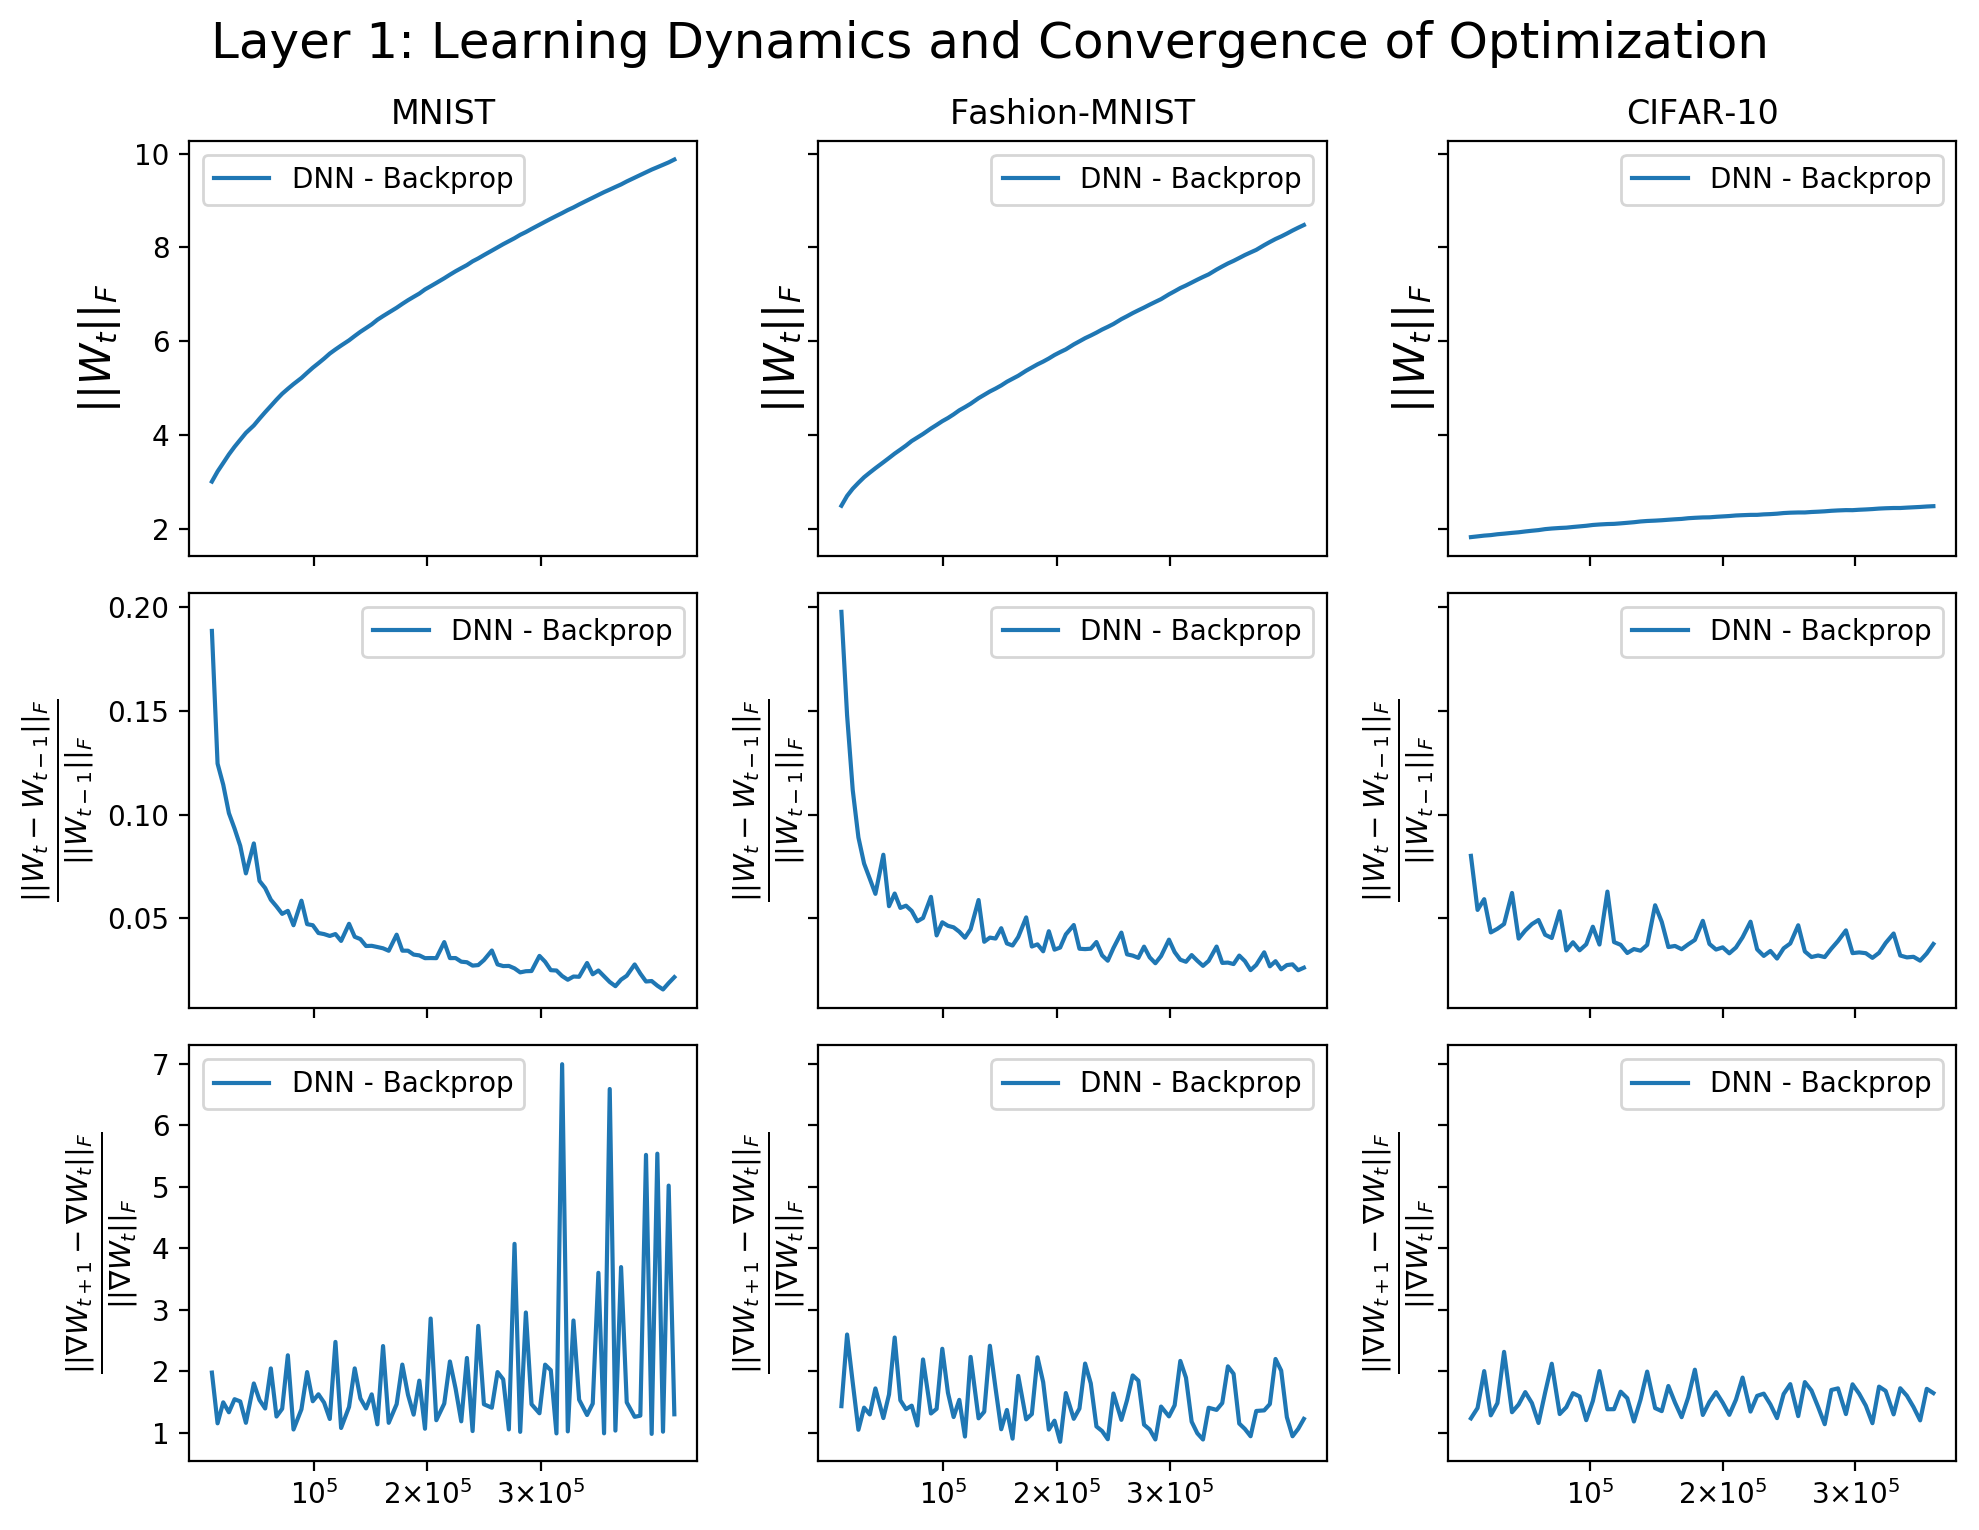

In [63]:
plot_weight_dev(its, 2, fr_n_weights, fr_n_weights_ch, fr_n_weights_grad_ch, 
                'Layer 1: Learning Dynamics and Convergence of Optimization')

### Visualize BO Evaluation Distribution - Hyperparameter Robustness

In [4]:
mnist_bo_log = log_dir + '/bo_logs_dnn_mnist_session.json'
fashion_bo_log = log_dir + '/bo_logs_dnn_fashion_session.json'
cifar10_bo_log = log_dir + '/bo_logs_dnn_cifar10_session.json'

In [5]:
dnn_mnist_acc = get_accuracies_bo_log(mnist_bo_log)
dnn_fashion_acc = get_accuracies_bo_log(fashion_bo_log)
dnn_cifar10_acc = get_accuracies_bo_log(cifar10_bo_log)

bo_data = [[dnn_mnist_acc, dnn_fashion_acc, dnn_cifar10_acc]]

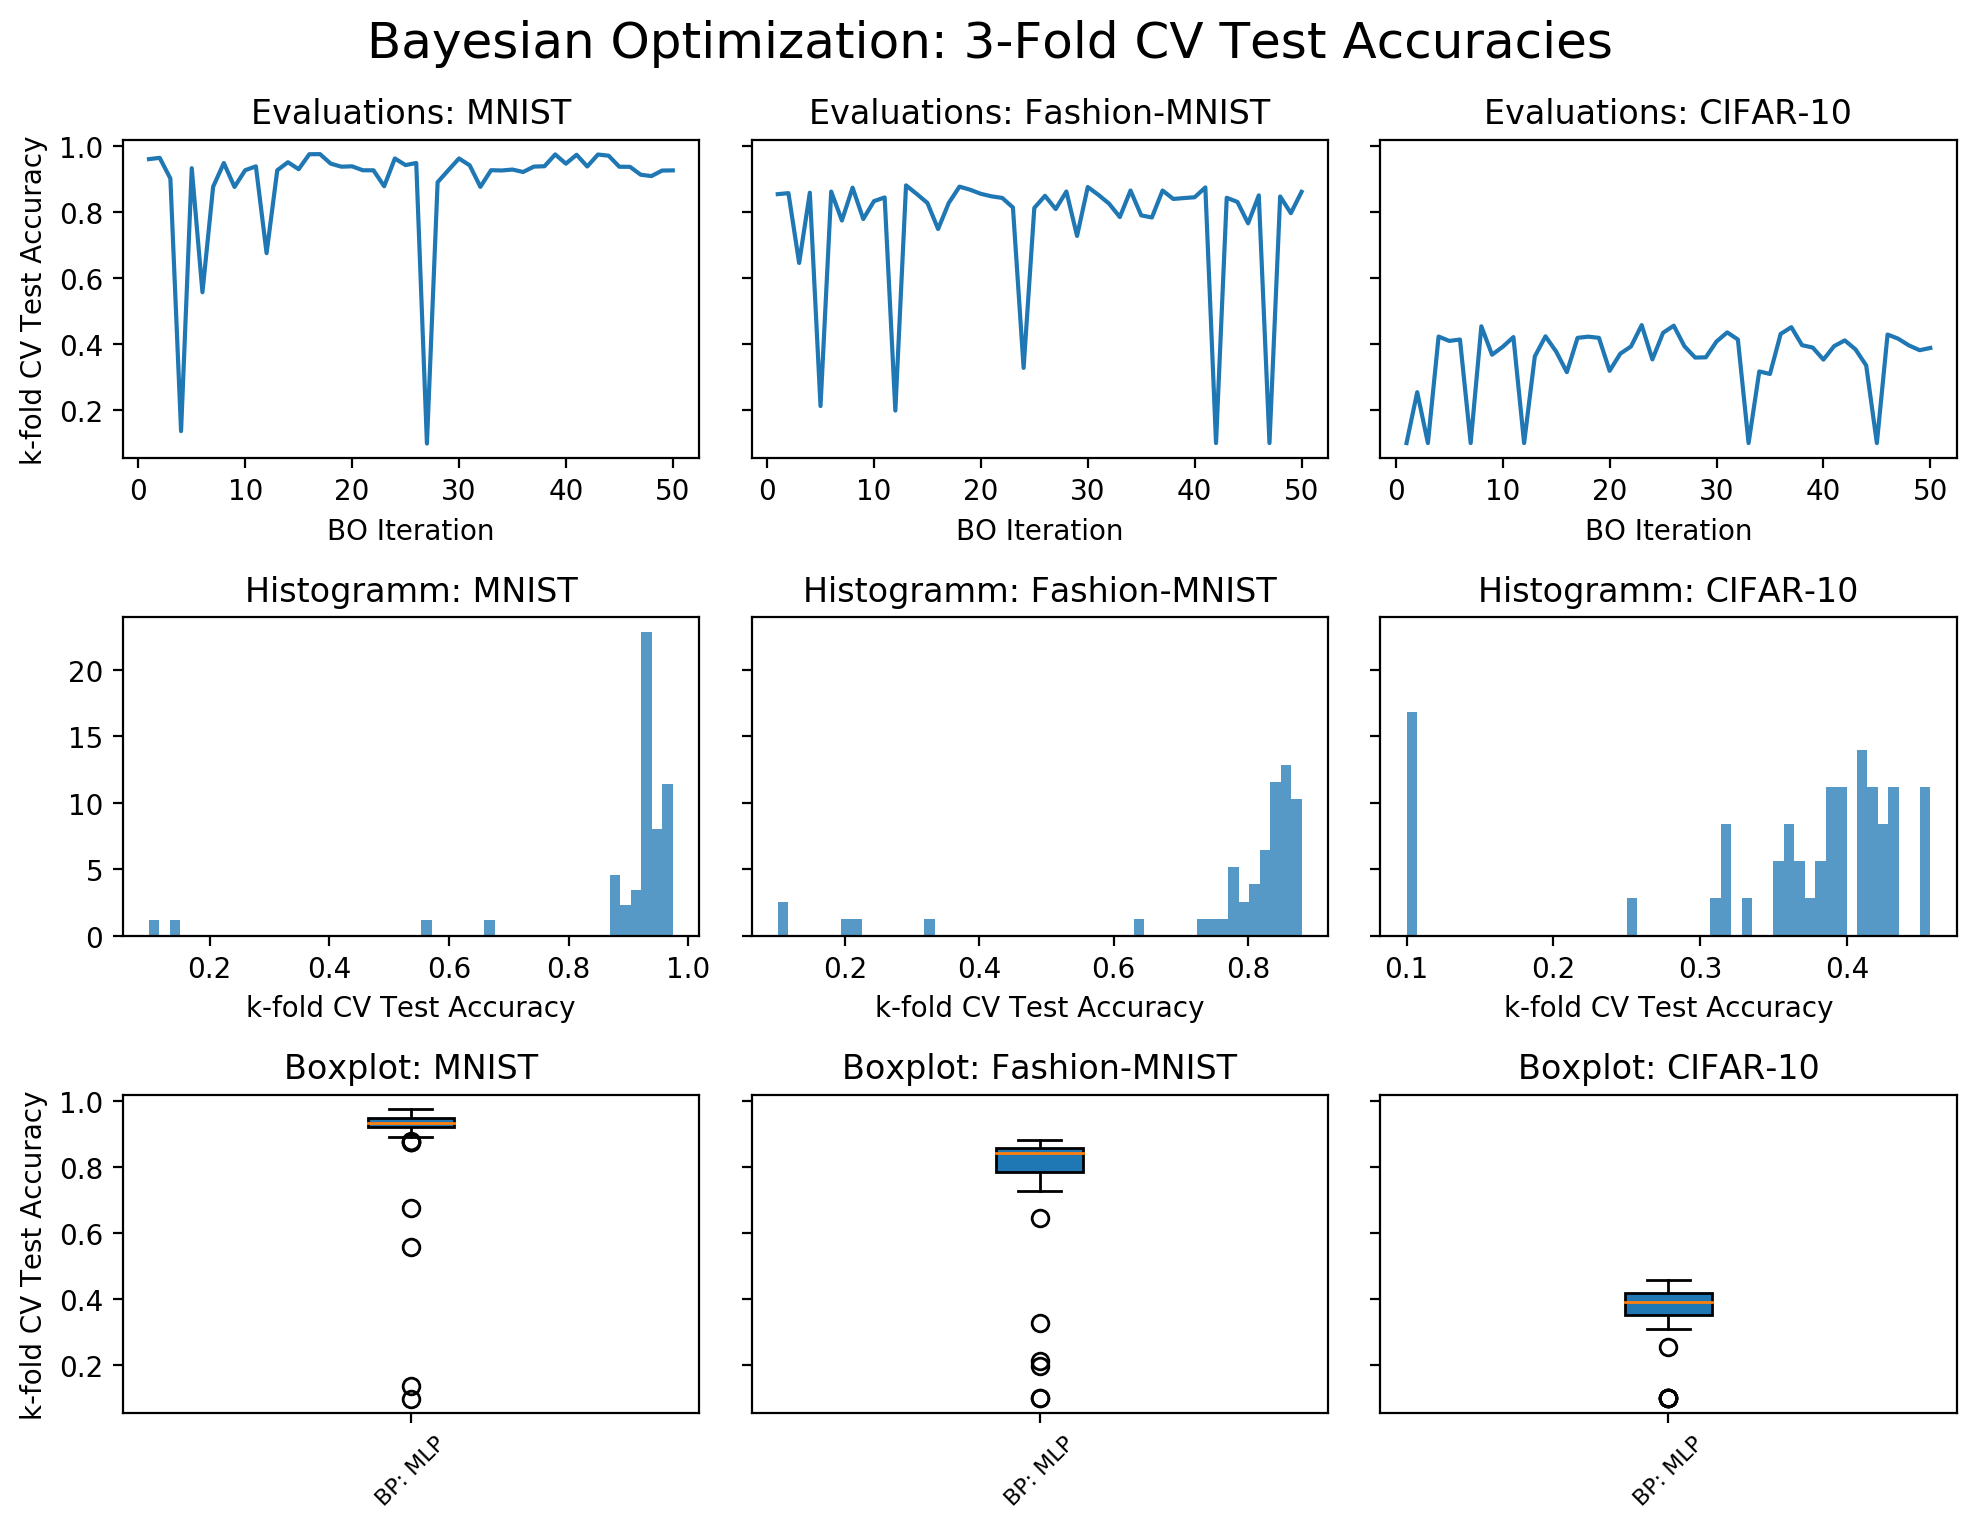

In [26]:
plot_bo_results(bo_data, "Bayesian Optimization: 3-Fold CV Test Accuracies")